# Changes in atmospheric cloud radiative heating.

This script generates figure 4: 
zonal-mean changes and maps of upper-tropospheric changes in atmospheric cloud-radiative heating during DJF for ICON, MPI-ESM and IPSL-CM5A.

### Load libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import netCDF4 as nc
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

import helper_functions as fct

### Specify the months of the year (needed for DJF mean)

In [2]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

### Read data (ICON, MPI-ESM, IPSL-CM5A)

In [3]:
# ICON
ipath = '../../ICON-NWP_lockedclouds/'
ifile = 'ICON-NWP_prp_T1C1_vs_T1C2_3d_40PL_mm.ymonmean.nc'
ncfile = nc.Dataset(ipath + ifile, 'r')
lats_icon = np.array(ncfile.variables['lat'][:].data)
lons_icon = np.array(ncfile.variables['lon'][:].data)
levs_icon = np.array(ncfile.variables['lev'][:].data)
dQsw = np.array(ncfile.variables['dQ_c_srad'][:].data) # shortwave
dQlw = np.array(ncfile.variables['dQ_c_trad'][:].data) # longwave
ncfile.close()
# add shortwave and longwave components
dQ_icon = (dQsw + dQlw) * 86400 # K/s -> K/day
del ipath, ifile, ncfile, dQsw, dQlw

# get DJF data
dQ_icon_djf = np.nanmean(np.array([dQ_icon[months.index('Jan'), :, :, :],
                                   dQ_icon[months.index('Feb'), :, :, :],
                                   dQ_icon[months.index('Dec'), :, :, :]]),
                         axis=0)
del dQ_icon

# levels must go from TOA to surface
if levs_icon[0] > levs_icon[1]:
    print('ICON: change order of levels to go from TOA to surface')
    levs_icon = levs_icon[::-1]
    dQ_icon_djf = dQ_icon_djf[::-1, :, :]

##############################################################################
# MPI-ESM
ipath = '../../MPI-ESM/'
ifile = 'MPI-ESM_prp_T1C1W1_vs_T1C2W1_3d_mm.ymonmean.nc'
ncfile = nc.Dataset(ipath + ifile, 'r')
lats_mpi = np.array(ncfile.variables['lat'][:].data)
lons_mpi = np.array(ncfile.variables['lon'][:].data)
levs_mpi = np.array(ncfile.variables['plev_2'][:].data)
dQsw = np.array(ncfile.variables['dQ_cld_srad'][:].data) # shortwave
dQlw = np.array(ncfile.variables['dQ_cld_trad'][:].data) # longwave
ncfile.close()
# add shortwave and longwave components
dQ_mpi = (dQsw + dQlw) * 86400 # K/s -> K/day
del ipath, ifile, ncfile, dQsw, dQlw

# set missing values (-9e33) to NaN
dQ_mpi[dQ_mpi <= -8e33] = np.nan

# get DJF data
dQ_mpi_djf = np.nanmean(np.array([dQ_mpi[months.index('Jan'), :, :, :],
                                  dQ_mpi[months.index('Feb'), :, :, :],
                                  dQ_mpi[months.index('Dec'), :, :, :]]),
                          axis=0)
del dQ_mpi

# levels must go from TOA to surface
if levs_mpi[0] > levs_mpi[1]:
    print('ECHAM: change order of levels to go from TOA to surface')
    levs_mpi = levs_mpi[::-1]
    dQ_mpi_djf = dQ_mpi_djf[::-1, :, :]

##############################################################################
# IPSL-CM5A
ipath = '../../IPSL-CM5A/'
ifile = 'IPSL-CM5A_prp_T1C1W1_vs_T1C2W1_3d_mm.remapcon.ymonmean.nc'
ncfile = nc.Dataset(ipath + ifile, 'r')
lats_ipsl = np.array(ncfile.variables['lat'][:].data)
lons_ipsl = np.array(ncfile.variables['lon'][:].data)
levs_ipsl = np.array(ncfile.variables['presnivs'][:].data)
dtswr = np.array(ncfile.variables['dtswr'][:].data)
dtlwr = np.array(ncfile.variables['dtlwr'][:].data)
dtswr_prpc = np.array(ncfile.variables['dtswr_prpc'][:].data)
dtlwr_prpc = np.array(ncfile.variables['dtlwr_prpc'][:].data)
ncfile.close()
# get change in cloud-radiative heating in K/day
# multiply with 86400 to get K/s -> K/day
dQ_ipsl = 86400 * ((dtswr_prpc + dtlwr_prpc) - (dtswr + dtlwr))
del ifile, ncfile, dtswr, dtlwr, dtswr_prpc, dtlwr_prpc

# set missing values (9.9e36) to NaN
dQ_ipsl[dQ_ipsl >= 9e36] = np.nan

# get DJF data
dQ_ipsl_djf = np.nanmean(np.array([dQ_ipsl[months.index('Jan'), :, :, :],
                                   dQ_ipsl[months.index('Feb'), :, :, :],
                                   dQ_ipsl[months.index('Dec'), :, :, :]]),
                        axis=0)
del dQ_ipsl

# levels must go from TOA to surface
if levs_ipsl[0] > levs_ipsl[1]:
    print('LMD: change order of levels to go from TOA to surface')
    levs_ipsl = levs_ipsl[::-1]
    dQ_ipsl_djf = dQ_ipsl_djf[::-1, :, :]

##############################################################################
# check that all missing values are replaced by NaN's
print(np.isnan(dQ_icon_djf).any(), np.nanmin(dQ_icon_djf), np.nanmax(dQ_icon_djf))
print(np.isnan(dQ_mpi_djf).any(), np.nanmin(dQ_mpi_djf), np.nanmax(dQ_mpi_djf))
print(np.isnan(dQ_ipsl_djf).any(), np.nanmin(dQ_ipsl_djf), np.nanmax(dQ_ipsl_djf))

/sw/rhel6-x64/conda/anaconda3-bleeding_edge/lib/python3.6/site-packages/ipykernel_launcher.py:50: RuntimeWarning: Mean of empty slice


LMD: change order of levels to go from TOA to surface
False -5.538915423676372 5.984612123575062
True -8.794642752036452 10.795256146229804
False -14.69999528490007 12.625148193910718


### Read tropopause height (with interpolated missing values) and calculate vertical mean dQ for a 200hPa thick layer below tropopause.

NOTE: pressure value that is closer to the ground must be the second plev value that is given to the function get_verticalmean_overp_tropo (due to order of levels in levs array).

In [4]:
ipath = '../../tropopause_T1C1_T1C1W1/'

# ICON
ifile = 'ICON-NWP_AMIP_T1C1_tropopause_DJF_timemean.fillmiss.nc'
ncfile = nc.Dataset(ipath + ifile, 'r')
tropo = ncfile.variables['ptrop'][:]
ncfile.close()
del ifile, ncfile

# find index of tropopause height for each grid point
tropoind1 = np.full((lats_icon.size, lons_icon.size), np.nan, dtype=int)
# index 300 hPa below tropopause
tropoind2 = np.full((lats_icon.size, lons_icon.size), np.nan, dtype=int)
for la in range(lats_icon.size):
    for lo in range(lons_icon.size):
        tropoind1[la, lo] = np.argmin(np.abs(levs_icon-tropo[la,lo]))
        tropoind2[la, lo] = np.argmin(np.abs(levs_icon-(tropo[la, lo]+20000)))
    del lo
del la

# calculate vertical-mean dQ
dQ_icon_vmean = fct.get_verticalmean_overp_tropo(dQ_icon_djf, levs_icon,
                                                 tropoind1, tropoind2)

# get zonal-mean tropopause
tropo_icon = np.nanmean(tropo, axis=1)

# delete temporary variables
del tropo, tropoind1, tropoind2

##############################################################################
# MPI-ESM
ifile = 'MPI-ESM_T1C1W1_tropopause_DJF_timemean.fillmiss.nc'
ncfile = nc.Dataset(ipath + ifile, 'r')
tropo = ncfile.variables['ptrop'][:]
ncfile.close()
del ifile, ncfile

# find index of tropopause height for each grid point
tropoind1 = np.full((lats_mpi.size, lons_mpi.size), np.nan, dtype=int)
# index 300 hPa below tropopause
tropoind2 = np.full((lats_mpi.size, lons_mpi.size), np.nan, dtype=int)
for la in range(lats_mpi.size):
    for lo in range(lons_mpi.size):
        tropoind1[la, lo] = np.argmin(np.abs(levs_mpi-tropo[la,lo]))
        tropoind2[la, lo] = np.argmin(np.abs(levs_mpi-(tropo[la, lo]+20000)))
    del lo
del la

# calculate vertical-mean dQ
dQ_mpi_vmean = fct.get_verticalmean_overp_tropo(dQ_mpi_djf, levs_mpi,
                                                tropoind1, tropoind2)

# get zonal-mean tropopause
tropo_mpi = np.nanmean(tropo, axis=1)

# delete temporary variables
del tropo, tropoind1, tropoind2

##############################################################################
# IPSL-CM5A
ifile = 'IPSL-CM5A_T1C1W1_tropopause_DJF_remapcon_timemean.fillmiss.nc'
ncfile = nc.Dataset(ipath + ifile, 'r')
tropo = ncfile.variables['ptrop'][:]
ncfile.close()
del ifile, ncfile

# find index of tropopause height for each grid point
tropoind1 = np.full((lats_ipsl.size, lons_ipsl.size), np.nan, dtype=int)
# index 300 hPa below tropopause
tropoind2 = np.full((lats_ipsl.size, lons_ipsl.size), np.nan, dtype=int)
for la in range(lats_ipsl.size):
    for lo in range(lons_ipsl.size):
        tropoind1[la, lo] = np.argmin(np.abs(levs_ipsl-tropo[la,lo]))
        tropoind2[la, lo] = np.argmin(np.abs(levs_ipsl-(tropo[la, lo]+20000)))
    del lo
del la

# calculate vertical-mean dQ
dQ_ipsl_vmean = fct.get_verticalmean_overp_tropo(dQ_ipsl_djf, levs_ipsl,
                                            tropoind1, tropoind2)

# get zonal-mean tropopause
tropo_ipsl = np.nanmean(tropo, axis=1)

# delete temporary variables
del tropo, tropoind1, tropoind2

del ipath

### Get zonal-mean changes in atmospheric cloud-radiative heating.

In [5]:
dQ_icon_djf_zm = np.nanmean(dQ_icon_djf, axis=2)
dQ_mpi_djf_zm = np.nanmean(dQ_mpi_djf, axis=2)
dQ_ipsl_djf_zm = np.nanmean(dQ_ipsl_djf, axis=2)

/sw/rhel6-x64/conda/anaconda3-bleeding_edge/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: Mean of empty slice
  


### Plot zonal-mean and maps of upper-tropospheric changes in atmospheric cloud-radiative heating in ICON, MPI-ESM and IPSL-CM5A.

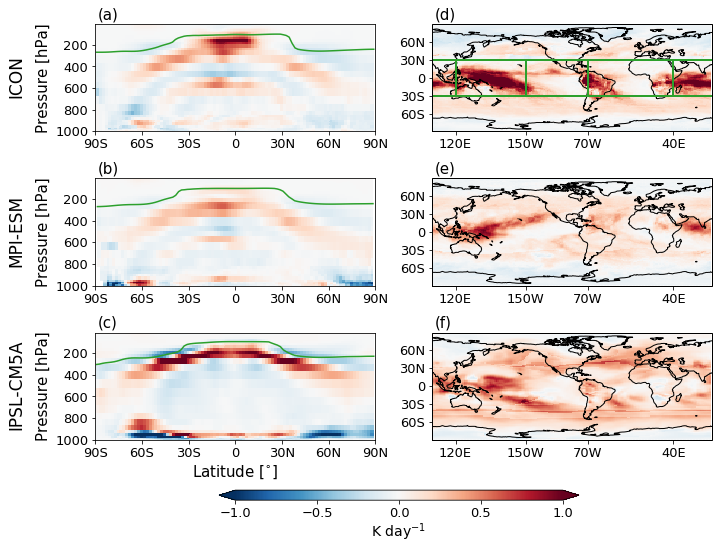

In [6]:
# shift longitudes from 0deg...360deg to -90deg...270deg for visualization reasons
dQ_icon_vmean_shift, lons_icon_shift = fct.shiftgrid_copy(90., dQ_icon_vmean, lons_icon, start=False)
dQ_mpi_vmean_shift, lons_mpi_shift = fct.shiftgrid_copy(90., dQ_mpi_vmean, lons_mpi, start=False)
dQ_ipsl_vmean_shift, lons_ipsl_shift = fct.shiftgrid_copy(90., dQ_ipsl_vmean, lons_ipsl, start=False)

# limit for colorbar
vlim = 1

fig, ax = plt.subplots(3, 2, figsize=(10, 7))#figsize(10))
# zonal-mean change
cf0 = ax[0, 0].pcolormesh(lats_icon, levs_icon/100, dQ_icon_djf_zm,
                          vmin=-vlim, vmax=vlim, cmap='RdBu_r')
ax[1, 0].pcolormesh(lats_mpi, levs_mpi/100, dQ_mpi_djf_zm,
                    vmin=-vlim, vmax=vlim, cmap='RdBu_r')
ax[2, 0].pcolormesh(lats_ipsl, levs_ipsl/100, dQ_ipsl_djf_zm,
                    vmin=-vlim, vmax=vlim, cmap='RdBu_r')
# zonal-mean tropopause
ax[0, 0].plot(lats_icon, tropo_icon/100, color='tab:green')
ax[1, 0].plot(lats_mpi, tropo_mpi/100, color='tab:green')
ax[2, 0].plot(lats_ipsl, tropo_ipsl/100, color='tab:green')

for i in range(ax.shape[0]):
    ax[i, 0].tick_params(labelsize=13)
    ax[i, 0].set(xticks=np.arange(-90, 91, 30),
              xticklabels=['90S', '60S', '30S', '0', '30N', '60N' ,'90N'],
              xlim=(-90, 90))
    ax[i, 0].set_yticks(np.arange(0, 1100, 200))
    ax[i, 0].set_ylim(1000, 10)
    ax[i, 0].set_ylabel('Pressure [hPa]', fontsize=15)
del i
ax[2, 0].set_xlabel('Latitude [$^{\circ}$]', fontsize=15)
# text for models
mods = ['ICON', 'MPI-ESM', 'IPSL-CM5A']
for i in range(ax.shape[0]):
    ax[i, 0].text(-0.25, 0.51, mods[i], va='bottom', ha='center',
                  rotation='vertical', rotation_mode='anchor',
                  fontsize=17, transform=ax[i, 0].transAxes)
del i
###################################################################
# maps
ax1 = plt.subplot(3, 2, 2, projection=ccrs.PlateCarree(central_longitude=-90))
ax1.pcolormesh(lons_icon_shift, lats_icon, dQ_icon_vmean_shift,
               vmin=-vlim, vmax=vlim, cmap='RdBu_r',
               rasterized=True,
               transform=ccrs.PlateCarree())
ax2 = plt.subplot(3, 2, 4, projection=ccrs.PlateCarree(central_longitude=-90))
ax2.pcolormesh(lons_icon_shift, lats_icon, dQ_mpi_vmean_shift,
               vmin=-vlim, vmax=vlim, cmap='RdBu_r',
               rasterized=True,
               transform=ccrs.PlateCarree())
ax3 = plt.subplot(3, 2, 6, projection=ccrs.PlateCarree(central_longitude=-90))
ax3.pcolormesh(lons_icon_shift, lats_icon, dQ_ipsl_vmean_shift,
               vmin=-vlim, vmax=vlim, cmap='RdBu_r',
               rasterized=True,
               transform=ccrs.PlateCarree())

for axis in [ax1, ax2, ax3]:
    axis.coastlines()
    axis.set_aspect('auto')
    axis.tick_params(labelsize=13)
    # set xticks and yticks for latitudes and longitudes
    # xaxis: longitudes
    axis.set_xticks([-150, -70, 40, 120], crs=ccrs.PlateCarree())
    lon_formatter = LongitudeFormatter(#zero_direction_label=True,
                                       degree_symbol='',
                                       dateline_direction_label=True)
    axis.xaxis.set_major_formatter(lon_formatter)
    del lon_formatter
    # yaxis: latitudes
    axis.set_yticks([-60, -30, 0, 30, 60],
                     crs=ccrs.PlateCarree())
    lat_formatter = LatitudeFormatter(degree_symbol='')
    axis.yaxis.set_major_formatter(lat_formatter)
    del lat_formatter
del axis

# add lines for tropical regions in ICON
latnort = 30   # northern boundary: 30°N
latsout = -30  # southern boundary: 30°S
lon1 = -150 # 150°W
lon2 = -70  # 70°W
lon3 = 40   # 40°E
lon4 = 120  # 120°E
# upper horizontal line
ax1.plot([90, -269.999], [latnort, latnort],
            linewidth=2, color='tab:green', transform=ccrs.PlateCarree())
# lower horizontal line
ax1.plot([90, -269.999], [latsout, latsout],
            linewidth=2, color='tab:green', transform=ccrs.PlateCarree())
# vertical lines
ax1.plot([lon1, lon1], [latsout, latnort],
            linewidth=2, color='tab:green', transform=ccrs.PlateCarree())
ax1.plot([lon2, lon2], [latsout, latnort],
            linewidth=2, color='tab:green', transform=ccrs.PlateCarree())
ax1.plot([lon3, lon3], [latsout, latnort],
            linewidth=2, color='tab:green', transform=ccrs.PlateCarree())
ax1.plot([lon4, lon4], [latsout, latnort],
            linewidth=2, color='tab:green', transform=ccrs.PlateCarree())
del latnort, latsout, lon1, lon2, lon3, lon4

# a), b) etc for subplots
labs1 = ['(a)', '(b)', '(c)']
labs2 = ['(d)', '(e)', '(f)']
for i in range(ax.shape[0]):
    ax[i, 0].text(0.01, 1.02, labs1[i], va='bottom', ha='left',
                  rotation_mode='anchor', fontsize=15,
                  transform=ax[i, 0].transAxes)
del i
for i, axis in enumerate([ax1, ax2, ax3]):
    axis.text(0.01, 1.02, labs2[i], va='bottom', ha='left',
              rotation_mode='anchor', fontsize=15,
              transform=axis.transAxes)
del i, axis
del labs1, labs2

del ax1, ax2, ax3


fig.canvas.draw()
fig.tight_layout()

# colorbar
fig.subplots_adjust(bottom=0.12)#(right=0.8)
clevs = np.array([-1, -0.5, 0, 0.5, 1])
cbar_ax = fig.add_axes([0.3, 0.0, 0.5, 0.02]) # left,bottom,width,height
cb = fig.colorbar(cf0, cax=cbar_ax, orientation='horizontal', extend='both',
                  ticks=clevs)
cb.set_label('K day$^{-1}$', fontsize=14, labelpad=1)
cb.ax.tick_params(labelsize=13)
del cbar_ax, cb, cf0, clevs

fig.savefig('figure4a_4f.pdf', bbox_inches='tight')
plt.show(fig)
plt.close(fig)
del fig, ax

del dQ_icon_vmean_shift, lons_icon_shift, dQ_mpi_vmean_shift, \
    lons_mpi_shift, dQ_ipsl_vmean_shift, lons_ipsl_shift
del vlim